[View in Colaboratory](https://colab.research.google.com/github/adityasingh1993/100DayMLChallenge/blob/master/Stochastic_Gradient_Descent_From_SCratch.ipynb)

# Stochastic Gradient Descent


### Pseudo Code For SGD



While True:


> batch = next_training_batch(data, 256)

> Wgradient = evaluate_gradient(loss, batch, W)


> W += -alpha * Wgradient









In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [0]:
def Sigmoid(X):
  return 1.0/(1.0+np.exp(-X))

In [0]:
def sigmoid_test():
  list2=[]
  list1=np.arange(-10,10,0.2)
  for i in range(0,len(list1)):
    list2.append(Sigmoid(list1[i]))
  plt.plot(list1,list2)

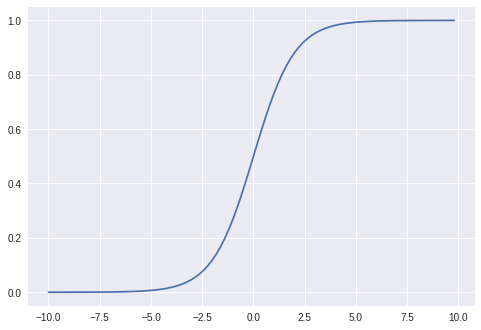

In [4]:
sigmoid_test()

In [0]:
def generate_Data():
  
  X,Y=make_blobs(n_samples=300,n_features=2,centers=2,cluster_std=1.5,random_state=20)
  return X,Y

In [0]:
X,Y=generate_Data()

### Let's Visualize Our Data

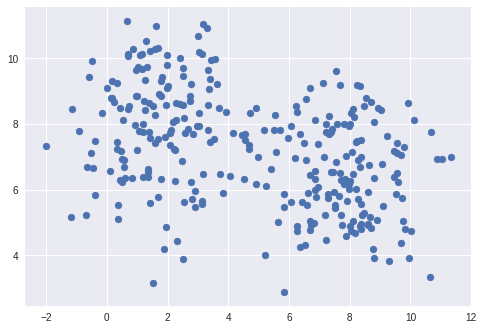

In [7]:
plt.scatter(X[:,0],X[:,1])

In [0]:
def AddBiasToData(X):
  return np.c_[np.ones((X.shape[0])),X]



In [0]:
def initalize_Weight(x_shape):
  return np.random.uniform(size=(x_shape,))
  
  

In [0]:
def gen_BatchSize(x,y,batch_size):
  for i in np.arange(0,X.shape[0],batch_size):
    yield(x[i:i+batch_size],y[i:i+batch_size])

In [0]:
def Training(X,W,Y,epoch,alpha,batchsize):
  lossHistory=[]
  for i in range(0,epoch):
    epochloss=[]
    for(batchX,batchY) in gen_BatchSize(X,Y,batchsize):
      y=np.dot(batchX,W)
      pred=Sigmoid(y)
      error=pred-batchY
      loss=np.sum(error**2)
      epochloss.append(loss)
      print("Epoch loss is {} for Epoch #{}".format(loss,i))
      gradient=np.dot(batchX.T,error)
      W+=-alpha*gradient
    lossHistory.append(np.average(epochloss))
    print("Average loss is {}".format(np.average(epochloss)))
  return lossHistory,W
    
      

In [14]:
X_bias=AddBiasToData(X)
W=initalize_Weight(X_bias.shape[1])
lossHistory,W=Training(X_bias,W,Y,100,0.1,10)

Epoch loss is 5.794975892749037 for Epoch #0
Epoch loss is 2.999999999992455 for Epoch #0
Epoch loss is 5.013374403924701 for Epoch #0
Epoch loss is 8.656928458518703 for Epoch #0
Epoch loss is 1.1684621585632893 for Epoch #0
Epoch loss is 0.47065774496767765 for Epoch #0
Epoch loss is 4.507126555978555e-14 for Epoch #0
Epoch loss is 0.6113333017796827 for Epoch #0
Epoch loss is 0.9608234000687689 for Epoch #0
Epoch loss is 8.230131480358713e-09 for Epoch #0
Epoch loss is 0.0008469041324361212 for Epoch #0
Epoch loss is 1.7545473967695147e-06 for Epoch #0
Epoch loss is 0.018546220924239736 for Epoch #0
Epoch loss is 4.287551235420203e-08 for Epoch #0
Epoch loss is 7.614474966659611e-13 for Epoch #0
Epoch loss is 0.008912518104817177 for Epoch #0
Epoch loss is 5.579822669204371e-06 for Epoch #0
Epoch loss is 0.20100364922339964 for Epoch #0
Epoch loss is 1.0852770112105285e-12 for Epoch #0
Epoch loss is 9.756462432894836e-15 for Epoch #0
Epoch loss is 0.00122017174569243 for Epoch #0
Ep

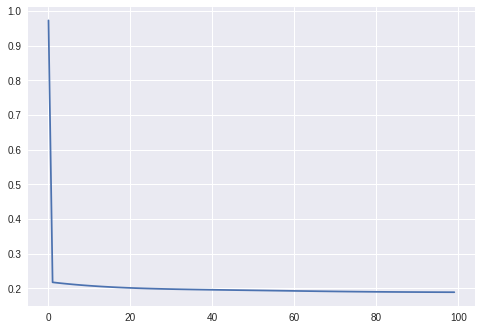

In [15]:
plt.plot(np.arange(0,100),lossHistory)

In [0]:
def predict(X):
  for i in np.random.choice(300,10):
    
    y=np.dot(X[i],W)
    pred=Sigmoid(y)
    if pred<0.5:
      print("label 0")
    else:
      print("label 1")
      

In [17]:
predict(X_bias)

label 0
label 0
label 1
label 0
label 0
label 0
label 0
label 1
label 0
label 0


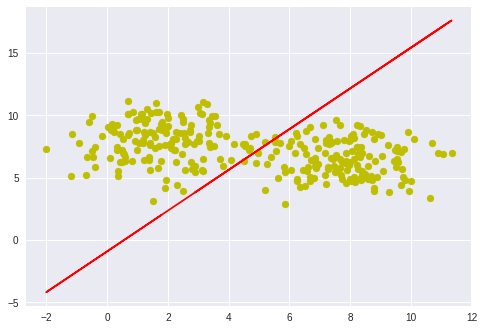

In [18]:
Y = (-W[0] - (W[1] * X)) / W[2]
plt.figure()
plt.scatter(X[:,0],X[:,1],c="y")
plt.plot(X,Y,"r-")